In [1]:
import numpy as np
import scanpy as sc
import scycle as cc
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 70

import os

import sys
DATA_PATH = '/home/risitop/OneDrive/Documents/PHD/y1/data/EwingSarcoma_Miller2020/'
sys.path.append(DATA_PATH)
plt.style.use('dark_background')

In [2]:
## We start from CPM_data.h5ad, which contains CPM_data.txt + Metadata.txt annotations
adata = sc.read_h5ad(DATA_PATH + 'CHLA9.h5ad')

## Computing a cell cycle trajectory estimation on a dataset copy
adata_tmp = adata.copy()
cc.pp.prep_pooling(adata_tmp, filter_cells=True)
cc.tl.dimensionality_reduction(adata_tmp, method="ica")
cc.tl.enrich_components(adata_tmp)
cc.tl.principal_circle(adata_tmp, verbose=False)

## Normalize the raw dataset with respect to the trajectory
adata_no_circle = adata.copy()
cc.pp.normalize_by_partition(adata, adata_tmp, verbose=False)

## Standard kNN-pooling + PCA
cc.pp.prep_pooling(adata, filter_cells=True)
cc.pp.prep_pooling(adata_no_circle, filter_cells=True)

# adata = sc.read_h5ad(DATA_PATH + 'CHLA9_pp.h5ad')

Preparing embedding...
3099 samples pass the count filter
4547  samples pass the mt filter
Samples selected 3044
Embedding for pooling...
Pooling 3044 samples...
-- Dimensionality reduction using ICA...
-- Done
G1/S  score: 7.158553
G2/M+ score: 10.299504
G2/M- score: 6.904978
HIST  score: 16.251218
--- Selected components:
G1/S: 1 (score=7.158553)
G2/M: 12 (score=10.299504)
G2/M-: 10 (score=6.904978)
Histones: 2 (score=16.251218)
Calculating pseudotimes for each cell...
Preparing embedding...
3044 samples pass the count filter
3044  samples pass the mt filter
Samples selected 3044
Embedding for pooling...
Pooling 3044 samples...
Preparing embedding...
3099 samples pass the count filter
4547  samples pass the mt filter
Samples selected 3044
Embedding for pooling...
Pooling 3044 samples...


In [3]:
# adata.write_h5ad(DATA_PATH + 'CHLA9_pp.h5ad')

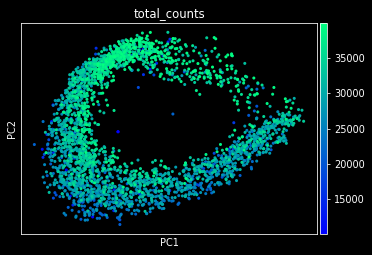

In [4]:
sc.tl.pca(adata_no_circle, n_comps=30)
sc.pl.pca(adata_no_circle, cmap='winter', color='total_counts')

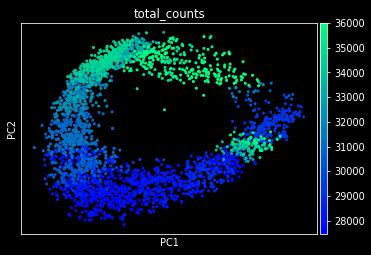

In [5]:
sc.tl.pca(adata, n_comps=30)
sc.pl.pca(adata, cmap='winter', color='total_counts')

In [5]:
cc.tl.dimensionality_reduction(adata, method="ica")
cc.tl.enrich_components(adata, verbose=True)

-- Dimensionality reduction using ICA...
-- Done
G1/S  score: 7.180614
G2/M+ score: 10.293838
G2/M- score: 6.586134
HIST  score: 16.112680
--- Selected components:
G1/S: 1 (score=7.180614)
G2/M: 12 (score=10.293838)
G2/M-: 10 (score=6.586134)
Histones: 2 (score=16.112680)


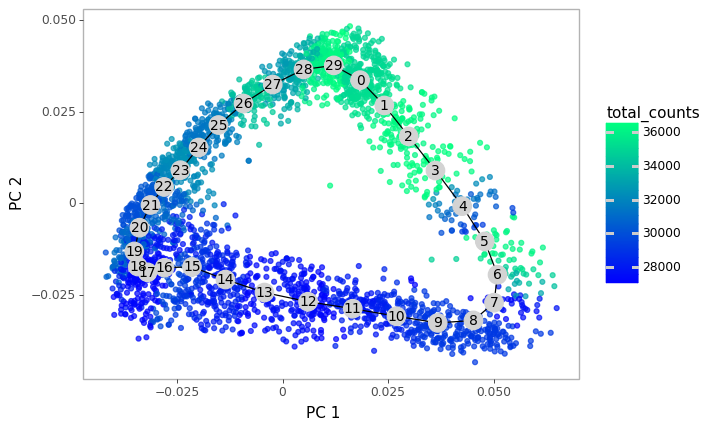

<ggplot: (8753483197672)>

In [6]:
cc.tl.principal_circle(adata)
cc.pl.scatter_projection(adata, palette='winter', trajectory=True)